### Load the mnist data

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
pixelData = mnist['data']
print(pixelData.shape)
digitData = mnist['target']
print(digitData.shape)

(70000, 784)
(70000,)


### Confirm that the data is already randomized

In [2]:
print(digitData[0:100])
digitData.dtype
def strtonum(x):
    return int(x)

f = np.vectorize(strtonum)
digits = f(digitData)
print(digits[0:100])
print(digits[9900:10000])
print(digits[59900:60000])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9' '4' '0' '9' '1' '1' '2' '4' '3' '2' '7' '3' '8' '6' '9' '0' '5'
 '6' '0' '7' '6' '1' '8' '7' '9' '3' '9' '8' '5' '9' '3' '3' '0' '7' '4'
 '9' '8' '0' '9' '4' '1' '4' '4' '6' '0' '4' '5' '6' '1' '0' '0' '1' '7'
 '1' '6' '3' '0' '2' '1' '1' '7' '9' '0' '2' '6' '7' '8' '3' '9' '0' '4'
 '6' '7' '4' '6' '8' '0' '7' '8' '3' '1']
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
[8 7 1 1 3 7 1 1 7 6 1 7 2 3 0 3 3 6 8 5 4 6 0 2 8 8 6 7 6 6 1 4 3 9 0 8 8
 8 9 2 4 9 1 6 8 5 6 5 8 9 9 5 8 3 7 7 8 4 5 3 1 6 2 0 2 0 0 6 9 9 8 0 2 1
 3 1 4 3 0 2 4 1 8 0 4 0 0 1 7 2 7 3 7 4 0 5 8 6 9 7]
[4 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 8 9 0 1 2 3 4 5 6 7 8 9 6 0 3 4 1 4 0 7 8
 7 7 9 0 4 9 4 0 5 8 5 9 8 8 4 0 7 1 3 5 3 1 6 5 3 8 7 3 1 6 8 5 9 2 2 0 9
 2 4 6 7 3 1 3 6 6 2 1 2 6 0 7 8 9 

### Display the first 4 digits

In [3]:
fPixelData = pixelData.astype(np.float32)
fPixelData.dtype

dtype('float32')

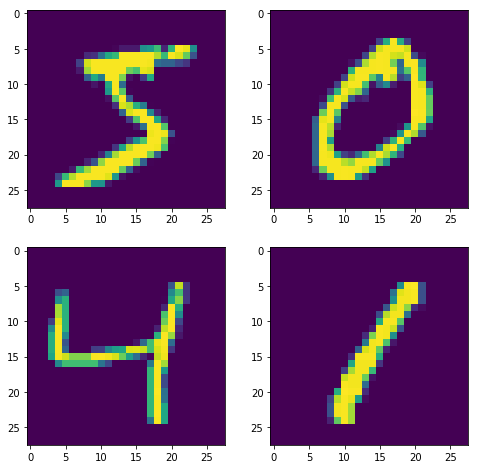

In [4]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(2,2,1)
plt.imshow(pixelData[0,:].reshape(28,28), interpolation='nearest')
fig.add_subplot(2,2,2)
plt.imshow(pixelData[1,:].reshape(28,28), interpolation='nearest')
fig.add_subplot(2,2,3)
plt.imshow(pixelData[2,:].reshape(28,28), interpolation='nearest')
fig.add_subplot(2,2,4)
plt.imshow(pixelData[3,:].reshape(28,28), interpolation='nearest')

### Make tSNE embeddings for 60000 and 10000 digits

In [9]:
import nptsne
tsne = nptsne.TextureTsne()
X60000 = tsne.fit_transform(fPixelData[0:60000, :])
X10000 = tsne.fit_transform(fPixelData[0:10000, :])

### Make tSNE embedding for 784 pixels versus 60000 digits

In [14]:
transposePixelData = fPixelData.transpose()
tsne = nptsne.TextureTsne()
Y60000 = tsne.fit_transform(transposePixelData[:,0:60000])

### Plot the embeddings

<U7
(10,)
['#00FFFF' '#FF0000' '#00FF66' ... '#0066FF' '#FF0099' '#3300FF']


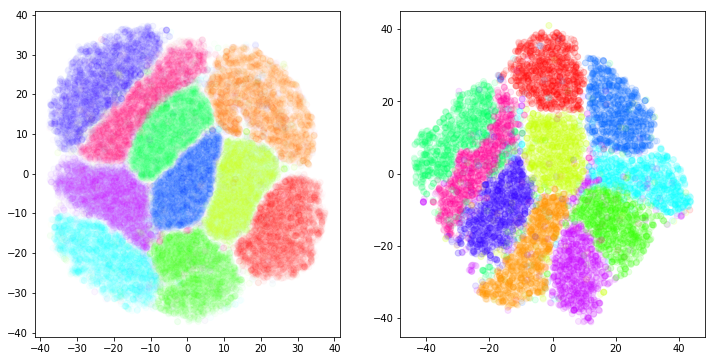

In [10]:
colors = np.array(['#FF0000', '#FF9900', '#CCFF00', '#33FF00', '#00FF66', '#00FFFF', '#0066FF', '#3300FF', '#CC00FF', '#FF0099'])
print(colors.dtype)
print(colors.shape)
digitColor60000 = colors[digits[0:60000]]
digitColor10000 = colors[digits[0:10000]]
print(digitColor10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.scatter(X60000[0::2], X60000[1::2], c=digitColor60000, alpha=0.01)
ax2.scatter(X10000[0::2], X10000[1::2], c=digitColor10000, alpha=0.1)
plt.show()

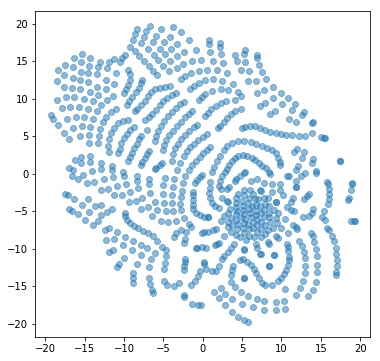

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(Y60000[0::2], Y60000[1::2], alpha=0.5)
plt.show()

### Save the embedding coords

In [31]:
import json
import copy
from pathlib import Path

X10000_pair = X10000.reshape(10000, 2)
X60000_pair = X60000.reshape(60000, 2)

X10000_round = [[round(y,3) for y in x] for x in X10000_pair.tolist()]
X60000_round = [[round(y,3) for y in x] for x in X60000_pair.tolist()]

prop_template = {'voxel_props': {'mnist_index': [], 'label': []}}

print('10000 digit embedding')
MNIST10000 = {'dims': 2, 'points': X10000_round}
print(MNIST10000)
Path('MNIST10000_tsne_plot.json').write_text(json.dumps(MNIST10000))
MNIST10000_props = copy.deepcopy(prop_template)
MNIST10000_props['voxel_props']['mnist_index'] = list(range(10000))
MNIST10000_props['voxel_props']['label'] = digits[0:10000].tolist()
Path('MNIST10000_props.json').write_text(json.dumps(MNIST10000_props))

#print(json.dumps(MNIST10000))

#print('60000 digit embedding')
MNIST60000 = {'dims': 2, 'points': X60000_round}
Path('MNIST60000_tsne_plot.json').write_text(json.dumps(MNIST60000))
MNIST60000_props = copy.deepcopy(prop_template)
MNIST60000_props['voxel_props']['mnist_index'] = list(range(60000))
MNIST60000_props['voxel_props']['label'] = digits[0:60000].tolist()
Path('MNIST60000_props.json').write_text(json.dumps(MNIST60000_props))

#print(json.dumps(MNIST60000))

10000 digit embedding
{'dims': 2, 'points': [[25.053, -0.676], [3.227, 29.46], [-26.911, 22.169], [-15.552, -35.306], [-22.2, 2.598], [-5.013, 9.234], [3.671, -8.937], [21.358, -23.798], [-1.389, -8.107], [-39.425, -0.557], [21.923, -13.692], [40.377, -9.782], [14.053, -8.388], [23.147, 17.738], [0.783, -12.28], [-23.97, -15.352], [5.185, 9.024], [7.587, -33.757], [15.693, 9.655], [-29.508, -12.347], [-21.045, 21.477], [2.074, 30.105], [-30.741, -8.386], [-15.803, -35.127], [-1.093, -24.408], [9.189, 2.348], [-25.696, 8.997], [28.383, -14.142], [-22.684, -22.984], [-29.75, -18.303], [10.561, -5.098], [6.839, -37.753], [16.292, 16.103], [-30.551, -13.002], [8.553, 22.913], [36.467, -8.179], [21.225, 12.124], [7.019, 24.751], [-7.328, -4.916], [20.601, 17.229], [-5.272, -16.27], [2.797, -30.354], [-11.092, -11.812], [-29.191, -10.505], [8.303, -11.335], [-26.415, -1.106], [5.199, -23.35], [36.455, -1.287], [7.369, -14.784], [17.8, -16.812], [20.227, -6.543], [-1.383, 29.649], [-15.899, -

588935

In [32]:
Y60000_pair = Y60000.reshape(784,2)
Y60000_round = [[round(y,3) for y in x] for x in Y60000_pair.tolist()]
print('784 pixel embedding')
MNISTPixels = {"dims": 2, "points": Y60000_round}
print(json.dumps(MNISTPixels))
Path('MNIST_pixel_plot.json').write_text(json.dumps(MNISTPixels))

index_list = []
for i in range(28):
    for j in range(28):
        index_list.append(f'[{i},{j}]')
MNISTPixelProps = {"voxel_props": {"label": index_list}}
Path('MNIST_pixel_props.json').write_text(json.dumps(MNISTPixelProps))


784 pixel embedding
{"dims": 2, "points": [[4.388, -4.905], [7.394, -7.326], [5.811, -6.666], [6.214, -4.254], [3.257, -5.173], [3.151, -7.149], [4.504, -2.714], [6.087, -5.796], [4.22, -3.21], [6.89, -6.871], [7.416, -5.26], [5.276, -2.219], [7.391, -10.726], [7.3, -10.708], [6.855, -9.916], [6.751, -9.317], [5.915, -8.309], [8.412, -4.343], [6.799, -5.449], [5.132, -4.238], [5.76, -3.841], [3.404, -4.717], [4.775, -8.405], [4.808, -5.8], [4.251, -3.87], [6.334, -6.372], [3.639, -7.752], [5.851, -4.727], [4.189, -4.441], [6.581, -3.418], [8.325, -3.294], [5.279, -7.862], [3.238, -3.754], [3.087, -3.667], [3.063, -2.006], [3.39, -1.734], [4.108, -0.903], [4.282, -0.744], [4.747, -0.302], [5.203, 0.106], [5.407, 0.274], [9.017, -10.807], [9.025, -10.802], [10.789, -7.915], [11.982, -7.321], [11.82, -7.035], [11.511, -6.774], [10.209, -2.852], [9.861, -2.232], [13.508, -2.755], [13.27, -3.019], [12.886, -3.333], [6.793, -4.218], [7.721, -5.805], [6.747, -4.91], [4.173, -8.181], [4.46, -6

8092